### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading data files

In [2]:
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

### Scoping

In [3]:
print('Observations head:\n', observations.head())
print('Observations info:\n', observations.info())
print('Observations columns:\n', observations.columns)
print('Observations observation data:\n', observations['observations'].describe())
print('Observations park counts:\n', observations['park_name'].value_counts())
print('Observations species counts:\n', observations['scientific_name'].nunique())


print('Species head:\n', species.head())
print('Species info:\n', species.info())
print('Species columns:\n', species.columns)
print('Species conservation status counts:\n', species['conservation_status'].value_counts())
print('Species species count:\n', species['scientific_name'].nunique())



Observations head:
             scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
Observations info:
 None
Observations columns:
 Index(['scientific_name', 'park_name', 'observations'], dtype='object')
O

### Modifying species - removing NaN

In [4]:
species_filled = species.fillna('No Concern')

### Creating one large DF

In [5]:
spe_obs = pd.merge(species_filled, observations, how='inner', on='scientific_name')
print(spe_obs.head())

  category                scientific_name              common_names  \
0   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
1   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
2   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
3   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
4   Mammal                      Bos bison     American Bison, Bison   

  conservation_status                            park_name  observations  
0          No Concern                  Bryce National Park           130  
1          No Concern            Yellowstone National Park           270  
2          No Concern  Great Smoky Mountains National Park            98  
3          No Concern               Yosemite National Park           117  
4          No Concern               Yosemite National Park           128  


### 1) Total sightings at each park

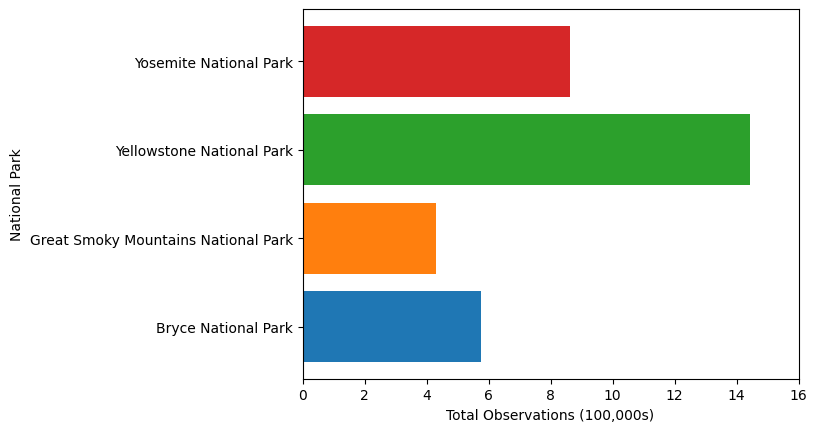

In [6]:
park_names = sorted(observations['park_name'].unique())
park_obs_count = [sum(observations['observations'][observations['park_name'] == park]) for park in park_names]

plt.figure()
plt.barh(park_names, park_obs_count, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.xlabel('Total Observations (100,000s)')
plt.xticks(range(0, 1600001, 200000), [0, 2, 4, 6, 8, 10, 12, 14, 16])
plt.ylabel('National Park')
plt.show()


### 2) Proportions of Observation by Park for each Conservation Status

['Endangered', 'In Recovery', 'No Concern', 'Species of Concern', 'Threatened']


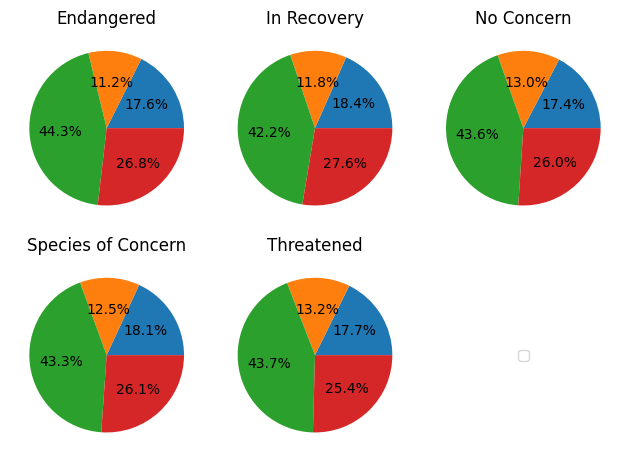

In [52]:
conservation_statuses = sorted(species_filled['conservation_status'].unique())
observations_by_consv_stat_park = spe_obs.groupby(['conservation_status', 'park_name'])['observations'].sum()

print(conservation_statuses)
# print(observations_by_consv_stat_park)
# print(park_names)
# print(observations_by_consv_stat_park['Bryce National Park'].values)

fig, axs = plt.subplots(2,3)

axs[0, 0].pie(observations_by_consv_stat_park[conservation_statuses[0]].values, autopct='%1.1f%%')
plt.axis('equal')
axs[0,0].set_title('Endangered')

axs[0, 1].pie(observations_by_consv_stat_park[conservation_statuses[1]].values, autopct='%1.1f%%')
plt.axis('equal')
axs[0,1].set_title('In Recovery')

axs[0, 2].pie(observations_by_consv_stat_park[conservation_statuses[2]].values, autopct='%1.1f%%')
plt.axis('equal')
axs[0,2].set_title('No Concern')

axs[1, 0].pie(observations_by_consv_stat_park[conservation_statuses[3]].values, autopct='%1.1f%%')
plt.axis('equal')
axs[1,0].set_title('Species of Concern')

axs[1, 1].pie(observations_by_consv_stat_park[conservation_statuses[4]].values, autopct='%1.1f%%')
plt.axis('equal')
axs[1,1].set_title('Threatened')

axs.flat[5].axis('off')
handles, _ = axs.flat[0].get_legend_handles_labels()
axs.flat[5].legend(handles, park_names, loc='center')
plt.tight_layout()

plt.show()

### 3) Threatened and Endangered Observations in Each Park

/var/folders/3q/38dxsxl95y3gx3nvvpwdkp7r0000gn/T/ipykernel_2091/2369495264.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(park_names, rotation=60, ha='right')


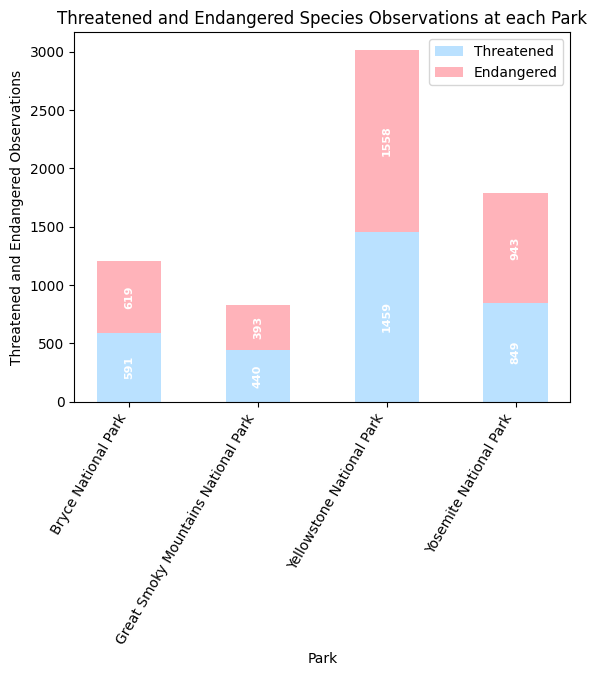

In [29]:
threatened_count = spe_obs[spe_obs['conservation_status'] == 'Threatened'].groupby('park_name')['observations'].sum().tolist()
endangered_count = spe_obs[spe_obs['conservation_status'] == 'Endangered'].groupby('park_name')['observations'].sum().tolist()
# print(threatened_count)
# print(endangered_count)

threat_endangered = {
    'park': park_names,
    'threatened': threatened_count,
    'endangered': endangered_count
}
df = pd.DataFrame(threat_endangered)

# print(df)

# Create a stacked bar plot using Matplotlib
fig, ax = plt.subplots()

width = 0.5

bar1 = ax.bar(x=park_names, height=threatened_count, width=width, label='Threatened', color='#BAE1FF')
bar2 = ax.bar(x=park_names, height=endangered_count, width=width, bottom=threatened_count, label='Endangered', color='#FFB3BA')

plt.title('Chart showing number of Threatened and Endangered Observations in each Park')

ax.set_xlabel('Park')
ax.set_xticklabels(park_names, rotation=60, ha='right')
ax.set_ylabel('Threatened and Endangered Observations')
ax.set_title('Threatened and Endangered Species Observations at each Park')
ax.legend()

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + height / 2,
            f'{height}',
            ha='center',
            va='center',
            rotation=90,
            fontsize=8,
            color='white',
            fontweight='bold'
        )
add_labels(bar1)
add_labels(bar2)

plt.show()
